# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'
#data_dir = './data'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

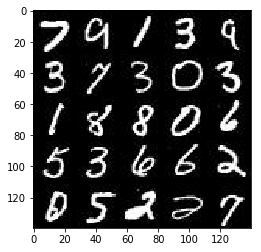

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

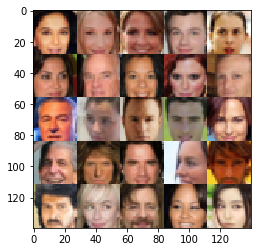

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name = 'learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    keep_probability = 0.9
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',kernel_initializer = tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=1, padding='same',kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 14x14x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same',kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 7x7x256
        
        #Dropout
        d_out = tf.nn.dropout(relu3, keep_probability)

        # Flatten it
        flat = tf.reshape(d_out, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
    
    
    
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    keep_probability = 0.5
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_probability)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_probability)
        # 7x7x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 14x14x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    # Set channel width
    if data_image_mode == "RGB":
        image_channels = 3
    else:
        image_channels = 1
        
    # Set data shape
        
    image_width = data_shape[1]
    image_height = data_shape[2]
    
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    # run g_train_opt twice
    _, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    show_every = 100
    print_every = 10
    steps = 0
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Normalize image to -1, 1
                batch_images = batch_images * 2.0
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                if (steps % print_every == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g)) 
                
                if (steps % show_every == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
                    
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4545... Generator Loss: 2.8753
Epoch 1/2... Discriminator Loss: 0.9782... Generator Loss: 1.1331
Epoch 1/2... Discriminator Loss: 0.8567... Generator Loss: 2.5954
Epoch 1/2... Discriminator Loss: 1.9472... Generator Loss: 0.3051
Epoch 1/2... Discriminator Loss: 0.5178... Generator Loss: 3.5807
Epoch 1/2... Discriminator Loss: 0.4179... Generator Loss: 3.8916
Epoch 1/2... Discriminator Loss: 0.5404... Generator Loss: 2.7215
Epoch 1/2... Discriminator Loss: 0.5361... Generator Loss: 2.2213
Epoch 1/2... Discriminator Loss: 0.3968... Generator Loss: 4.3384
Epoch 1/2... Discriminator Loss: 0.5137... Generator Loss: 2.4294


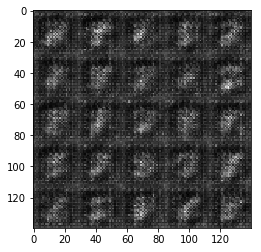

Epoch 1/2... Discriminator Loss: 1.9057... Generator Loss: 0.3697
Epoch 1/2... Discriminator Loss: 0.5588... Generator Loss: 2.1005
Epoch 1/2... Discriminator Loss: 0.4605... Generator Loss: 3.1455
Epoch 1/2... Discriminator Loss: 0.9596... Generator Loss: 4.4716
Epoch 1/2... Discriminator Loss: 0.4974... Generator Loss: 3.4470
Epoch 1/2... Discriminator Loss: 0.5013... Generator Loss: 2.9366
Epoch 1/2... Discriminator Loss: 0.4434... Generator Loss: 3.6044
Epoch 1/2... Discriminator Loss: 0.6478... Generator Loss: 4.2658
Epoch 1/2... Discriminator Loss: 0.4931... Generator Loss: 2.6477
Epoch 1/2... Discriminator Loss: 1.0356... Generator Loss: 0.8639


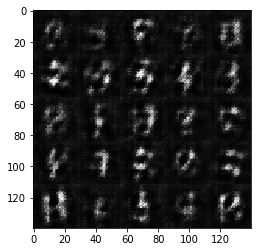

Epoch 1/2... Discriminator Loss: 0.5322... Generator Loss: 2.7400
Epoch 1/2... Discriminator Loss: 0.6389... Generator Loss: 1.6842
Epoch 1/2... Discriminator Loss: 0.5653... Generator Loss: 1.9754
Epoch 1/2... Discriminator Loss: 0.5270... Generator Loss: 2.4821
Epoch 1/2... Discriminator Loss: 0.5562... Generator Loss: 2.0791
Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 1.0959
Epoch 1/2... Discriminator Loss: 0.6815... Generator Loss: 3.0713
Epoch 1/2... Discriminator Loss: 2.0147... Generator Loss: 5.6143
Epoch 1/2... Discriminator Loss: 0.5155... Generator Loss: 2.7252
Epoch 1/2... Discriminator Loss: 0.6246... Generator Loss: 3.3914


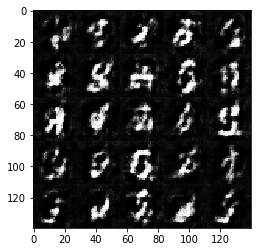

Epoch 1/2... Discriminator Loss: 0.6474... Generator Loss: 3.1496
Epoch 1/2... Discriminator Loss: 0.6509... Generator Loss: 1.7113
Epoch 1/2... Discriminator Loss: 0.7449... Generator Loss: 1.2474
Epoch 1/2... Discriminator Loss: 1.0041... Generator Loss: 1.0575
Epoch 1/2... Discriminator Loss: 0.6183... Generator Loss: 1.7988
Epoch 1/2... Discriminator Loss: 0.7429... Generator Loss: 1.4104
Epoch 1/2... Discriminator Loss: 0.5815... Generator Loss: 1.9392
Epoch 1/2... Discriminator Loss: 0.5354... Generator Loss: 2.4139
Epoch 1/2... Discriminator Loss: 0.6810... Generator Loss: 1.5076
Epoch 1/2... Discriminator Loss: 1.0069... Generator Loss: 0.9427


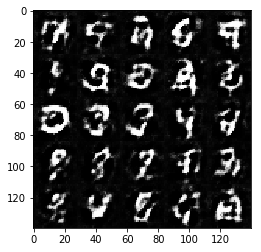

Epoch 1/2... Discriminator Loss: 0.4781... Generator Loss: 2.4616
Epoch 1/2... Discriminator Loss: 0.8149... Generator Loss: 1.2764
Epoch 1/2... Discriminator Loss: 0.7586... Generator Loss: 1.4811
Epoch 1/2... Discriminator Loss: 0.5876... Generator Loss: 1.8258
Epoch 1/2... Discriminator Loss: 0.6164... Generator Loss: 1.6901
Epoch 1/2... Discriminator Loss: 0.7977... Generator Loss: 1.3515
Epoch 1/2... Discriminator Loss: 1.3164... Generator Loss: 5.1648
Epoch 1/2... Discriminator Loss: 0.6495... Generator Loss: 2.7626
Epoch 1/2... Discriminator Loss: 0.5454... Generator Loss: 2.1617
Epoch 1/2... Discriminator Loss: 0.5150... Generator Loss: 2.4134


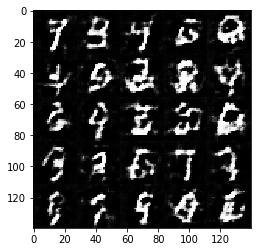

Epoch 1/2... Discriminator Loss: 0.5050... Generator Loss: 2.2727
Epoch 1/2... Discriminator Loss: 0.4470... Generator Loss: 2.8956
Epoch 1/2... Discriminator Loss: 0.5328... Generator Loss: 2.0115
Epoch 1/2... Discriminator Loss: 0.5284... Generator Loss: 2.0785
Epoch 1/2... Discriminator Loss: 0.5893... Generator Loss: 1.8842
Epoch 1/2... Discriminator Loss: 1.6222... Generator Loss: 0.5004
Epoch 1/2... Discriminator Loss: 0.7516... Generator Loss: 1.5832
Epoch 1/2... Discriminator Loss: 0.4986... Generator Loss: 2.8994
Epoch 1/2... Discriminator Loss: 1.1200... Generator Loss: 0.9342
Epoch 1/2... Discriminator Loss: 0.6133... Generator Loss: 3.2635


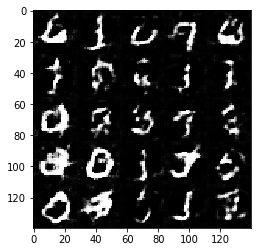

Epoch 1/2... Discriminator Loss: 0.4787... Generator Loss: 2.6431
Epoch 1/2... Discriminator Loss: 0.4772... Generator Loss: 2.3453
Epoch 1/2... Discriminator Loss: 0.4731... Generator Loss: 2.5511
Epoch 1/2... Discriminator Loss: 0.4796... Generator Loss: 2.6604
Epoch 1/2... Discriminator Loss: 0.5148... Generator Loss: 2.2253
Epoch 1/2... Discriminator Loss: 0.7712... Generator Loss: 1.4338
Epoch 1/2... Discriminator Loss: 0.9835... Generator Loss: 3.2749
Epoch 1/2... Discriminator Loss: 0.5414... Generator Loss: 2.0390
Epoch 1/2... Discriminator Loss: 0.5407... Generator Loss: 2.1931
Epoch 1/2... Discriminator Loss: 0.4718... Generator Loss: 2.8381


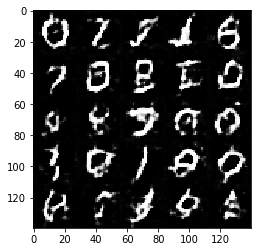

Epoch 1/2... Discriminator Loss: 0.8143... Generator Loss: 1.2793
Epoch 1/2... Discriminator Loss: 0.7543... Generator Loss: 1.8575
Epoch 1/2... Discriminator Loss: 0.7491... Generator Loss: 1.9100
Epoch 1/2... Discriminator Loss: 0.8710... Generator Loss: 1.3122
Epoch 1/2... Discriminator Loss: 0.5363... Generator Loss: 3.7179
Epoch 1/2... Discriminator Loss: 0.4899... Generator Loss: 3.1346
Epoch 1/2... Discriminator Loss: 0.5130... Generator Loss: 2.4957
Epoch 1/2... Discriminator Loss: 0.4476... Generator Loss: 2.8158
Epoch 1/2... Discriminator Loss: 0.5395... Generator Loss: 2.0231
Epoch 1/2... Discriminator Loss: 0.6464... Generator Loss: 3.1368


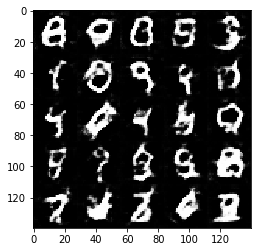

Epoch 1/2... Discriminator Loss: 3.5381... Generator Loss: 7.4209
Epoch 1/2... Discriminator Loss: 0.8567... Generator Loss: 1.3543
Epoch 1/2... Discriminator Loss: 0.8381... Generator Loss: 2.3592
Epoch 1/2... Discriminator Loss: 1.0465... Generator Loss: 0.8927
Epoch 1/2... Discriminator Loss: 0.7578... Generator Loss: 1.6693
Epoch 1/2... Discriminator Loss: 1.0672... Generator Loss: 3.5973
Epoch 1/2... Discriminator Loss: 0.7891... Generator Loss: 1.3772
Epoch 1/2... Discriminator Loss: 0.5487... Generator Loss: 3.0711
Epoch 1/2... Discriminator Loss: 0.4775... Generator Loss: 2.5739
Epoch 1/2... Discriminator Loss: 0.5453... Generator Loss: 2.1760


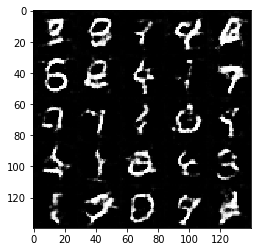

Epoch 1/2... Discriminator Loss: 0.5445... Generator Loss: 2.8978
Epoch 1/2... Discriminator Loss: 0.6667... Generator Loss: 1.7202
Epoch 1/2... Discriminator Loss: 0.4453... Generator Loss: 2.7558
Epoch 2/2... Discriminator Loss: 0.4801... Generator Loss: 2.3012
Epoch 2/2... Discriminator Loss: 1.5677... Generator Loss: 0.6008
Epoch 2/2... Discriminator Loss: 0.6904... Generator Loss: 1.7962
Epoch 2/2... Discriminator Loss: 0.5684... Generator Loss: 2.1212
Epoch 2/2... Discriminator Loss: 1.1578... Generator Loss: 4.4199
Epoch 2/2... Discriminator Loss: 0.4964... Generator Loss: 2.5824
Epoch 2/2... Discriminator Loss: 2.0803... Generator Loss: 4.8345


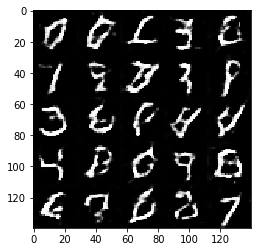

Epoch 2/2... Discriminator Loss: 0.6943... Generator Loss: 2.7996
Epoch 2/2... Discriminator Loss: 0.7243... Generator Loss: 1.6590
Epoch 2/2... Discriminator Loss: 0.5092... Generator Loss: 2.2851
Epoch 2/2... Discriminator Loss: 0.4724... Generator Loss: 2.3926
Epoch 2/2... Discriminator Loss: 0.9100... Generator Loss: 1.1104
Epoch 2/2... Discriminator Loss: 0.9669... Generator Loss: 1.0794
Epoch 2/2... Discriminator Loss: 0.6564... Generator Loss: 1.9049
Epoch 2/2... Discriminator Loss: 0.4680... Generator Loss: 2.7597
Epoch 2/2... Discriminator Loss: 0.4483... Generator Loss: 2.7387
Epoch 2/2... Discriminator Loss: 0.5523... Generator Loss: 2.2342


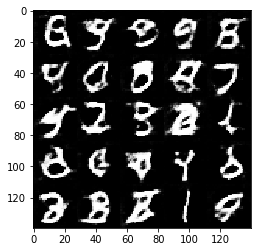

Epoch 2/2... Discriminator Loss: 0.4390... Generator Loss: 2.9584
Epoch 2/2... Discriminator Loss: 0.4241... Generator Loss: 3.2228
Epoch 2/2... Discriminator Loss: 0.4824... Generator Loss: 2.0427
Epoch 2/2... Discriminator Loss: 1.1706... Generator Loss: 1.0253
Epoch 2/2... Discriminator Loss: 0.9352... Generator Loss: 2.6998
Epoch 2/2... Discriminator Loss: 0.7903... Generator Loss: 1.5035
Epoch 2/2... Discriminator Loss: 0.8915... Generator Loss: 1.1418
Epoch 2/2... Discriminator Loss: 0.8682... Generator Loss: 2.2760
Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 1.8223
Epoch 2/2... Discriminator Loss: 0.6788... Generator Loss: 1.9596


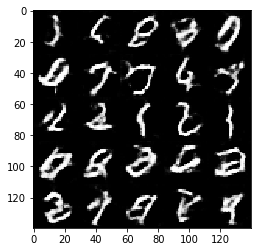

Epoch 2/2... Discriminator Loss: 0.6346... Generator Loss: 2.2500
Epoch 2/2... Discriminator Loss: 0.7090... Generator Loss: 1.7313
Epoch 2/2... Discriminator Loss: 0.5777... Generator Loss: 3.6246
Epoch 2/2... Discriminator Loss: 0.4889... Generator Loss: 2.9625
Epoch 2/2... Discriminator Loss: 0.4737... Generator Loss: 2.7899
Epoch 2/2... Discriminator Loss: 0.7943... Generator Loss: 4.6740
Epoch 2/2... Discriminator Loss: 0.7342... Generator Loss: 2.0834
Epoch 2/2... Discriminator Loss: 0.7100... Generator Loss: 1.4896
Epoch 2/2... Discriminator Loss: 0.8674... Generator Loss: 1.1556
Epoch 2/2... Discriminator Loss: 0.6808... Generator Loss: 1.5573


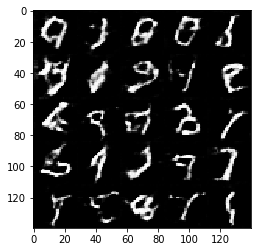

Epoch 2/2... Discriminator Loss: 0.6254... Generator Loss: 2.0103
Epoch 2/2... Discriminator Loss: 0.5663... Generator Loss: 2.0612
Epoch 2/2... Discriminator Loss: 0.4541... Generator Loss: 2.5406
Epoch 2/2... Discriminator Loss: 0.5329... Generator Loss: 3.1892
Epoch 2/2... Discriminator Loss: 1.1263... Generator Loss: 0.9751
Epoch 2/2... Discriminator Loss: 0.6977... Generator Loss: 1.5670
Epoch 2/2... Discriminator Loss: 0.4636... Generator Loss: 2.5426
Epoch 2/2... Discriminator Loss: 0.4712... Generator Loss: 3.2962
Epoch 2/2... Discriminator Loss: 0.5343... Generator Loss: 2.8009
Epoch 2/2... Discriminator Loss: 0.4686... Generator Loss: 2.9740


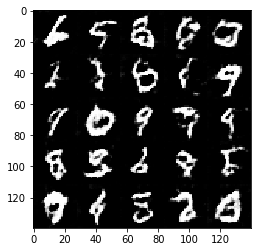

Epoch 2/2... Discriminator Loss: 0.5320... Generator Loss: 2.5496
Epoch 2/2... Discriminator Loss: 0.4717... Generator Loss: 3.0032
Epoch 2/2... Discriminator Loss: 0.6362... Generator Loss: 1.6515
Epoch 2/2... Discriminator Loss: 0.4737... Generator Loss: 2.9073
Epoch 2/2... Discriminator Loss: 0.4287... Generator Loss: 3.4022
Epoch 2/2... Discriminator Loss: 0.4508... Generator Loss: 4.4396
Epoch 2/2... Discriminator Loss: 1.4995... Generator Loss: 0.7795
Epoch 2/2... Discriminator Loss: 0.9978... Generator Loss: 3.1992
Epoch 2/2... Discriminator Loss: 0.7836... Generator Loss: 3.1507
Epoch 2/2... Discriminator Loss: 0.5538... Generator Loss: 2.4740


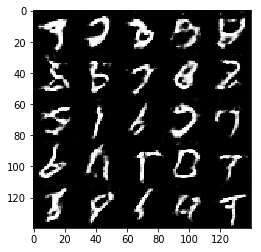

Epoch 2/2... Discriminator Loss: 0.4828... Generator Loss: 2.5130
Epoch 2/2... Discriminator Loss: 0.5473... Generator Loss: 2.0598
Epoch 2/2... Discriminator Loss: 0.4902... Generator Loss: 2.3992
Epoch 2/2... Discriminator Loss: 0.5295... Generator Loss: 2.5673
Epoch 2/2... Discriminator Loss: 0.4588... Generator Loss: 2.8149
Epoch 2/2... Discriminator Loss: 0.4148... Generator Loss: 2.7498
Epoch 2/2... Discriminator Loss: 0.4449... Generator Loss: 3.2377
Epoch 2/2... Discriminator Loss: 0.4521... Generator Loss: 3.1163
Epoch 2/2... Discriminator Loss: 0.5204... Generator Loss: 3.5038
Epoch 2/2... Discriminator Loss: 2.6098... Generator Loss: 5.3766


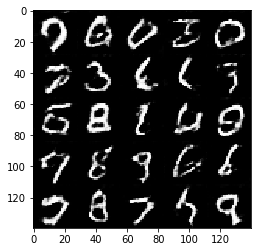

Epoch 2/2... Discriminator Loss: 0.8367... Generator Loss: 2.0778
Epoch 2/2... Discriminator Loss: 0.6913... Generator Loss: 1.6707
Epoch 2/2... Discriminator Loss: 0.7384... Generator Loss: 2.5961
Epoch 2/2... Discriminator Loss: 0.5627... Generator Loss: 2.2647
Epoch 2/2... Discriminator Loss: 0.6069... Generator Loss: 1.8114
Epoch 2/2... Discriminator Loss: 0.4921... Generator Loss: 3.1256
Epoch 2/2... Discriminator Loss: 0.4936... Generator Loss: 2.7262
Epoch 2/2... Discriminator Loss: 0.5094... Generator Loss: 2.4919
Epoch 2/2... Discriminator Loss: 1.1555... Generator Loss: 3.9950
Epoch 2/2... Discriminator Loss: 0.5069... Generator Loss: 2.6064


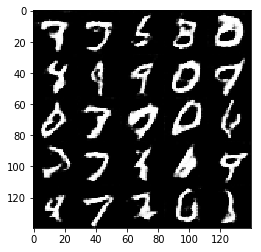

Epoch 2/2... Discriminator Loss: 0.4629... Generator Loss: 2.8374
Epoch 2/2... Discriminator Loss: 0.4566... Generator Loss: 3.6469
Epoch 2/2... Discriminator Loss: 0.8765... Generator Loss: 3.3939
Epoch 2/2... Discriminator Loss: 0.4982... Generator Loss: 2.4641
Epoch 2/2... Discriminator Loss: 0.4936... Generator Loss: 2.6542
Epoch 2/2... Discriminator Loss: 0.5028... Generator Loss: 3.1458
Epoch 2/2... Discriminator Loss: 0.4886... Generator Loss: 3.3302
Epoch 2/2... Discriminator Loss: 0.5271... Generator Loss: 2.5385
Epoch 2/2... Discriminator Loss: 2.1681... Generator Loss: 0.1937
Epoch 2/2... Discriminator Loss: 0.6306... Generator Loss: 1.7371


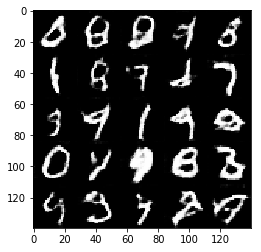

Epoch 2/2... Discriminator Loss: 0.4603... Generator Loss: 3.3095
Epoch 2/2... Discriminator Loss: 0.9793... Generator Loss: 0.9230
Epoch 2/2... Discriminator Loss: 0.7003... Generator Loss: 2.3122
Epoch 2/2... Discriminator Loss: 0.5958... Generator Loss: 1.7592
Epoch 2/2... Discriminator Loss: 0.6921... Generator Loss: 1.7823
Epoch 2/2... Discriminator Loss: 1.5907... Generator Loss: 0.6099
Epoch 2/2... Discriminator Loss: 0.7732... Generator Loss: 1.4643


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = .0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4540... Generator Loss: 2.8231
Epoch 1/1... Discriminator Loss: 0.4134... Generator Loss: 3.3538
Epoch 1/1... Discriminator Loss: 0.4023... Generator Loss: 3.7268
Epoch 1/1... Discriminator Loss: 0.3818... Generator Loss: 4.0987
Epoch 1/1... Discriminator Loss: 0.4184... Generator Loss: 3.3773
Epoch 1/1... Discriminator Loss: 0.3733... Generator Loss: 4.5969
Epoch 1/1... Discriminator Loss: 0.3831... Generator Loss: 4.3239
Epoch 1/1... Discriminator Loss: 0.3882... Generator Loss: 6.6941
Epoch 1/1... Discriminator Loss: 0.3717... Generator Loss: 4.3962
Epoch 1/1... Discriminator Loss: 0.4897... Generator Loss: 3.6832


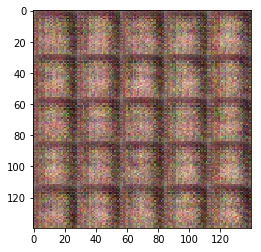

Epoch 1/1... Discriminator Loss: 0.4549... Generator Loss: 3.3231
Epoch 1/1... Discriminator Loss: 0.4747... Generator Loss: 3.3331
Epoch 1/1... Discriminator Loss: 0.4748... Generator Loss: 6.0743
Epoch 1/1... Discriminator Loss: 0.3932... Generator Loss: 3.7685
Epoch 1/1... Discriminator Loss: 0.4101... Generator Loss: 3.5209
Epoch 1/1... Discriminator Loss: 0.3794... Generator Loss: 5.2802
Epoch 1/1... Discriminator Loss: 0.4570... Generator Loss: 8.7808
Epoch 1/1... Discriminator Loss: 0.4443... Generator Loss: 3.3687
Epoch 1/1... Discriminator Loss: 0.4289... Generator Loss: 4.3356
Epoch 1/1... Discriminator Loss: 0.4263... Generator Loss: 3.6374


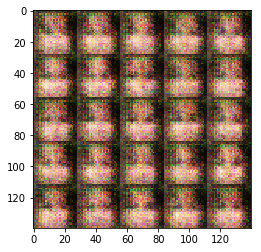

Epoch 1/1... Discriminator Loss: 0.3865... Generator Loss: 4.1261
Epoch 1/1... Discriminator Loss: 0.4666... Generator Loss: 3.0153
Epoch 1/1... Discriminator Loss: 0.7021... Generator Loss: 1.5573
Epoch 1/1... Discriminator Loss: 0.4849... Generator Loss: 6.5292
Epoch 1/1... Discriminator Loss: 0.3868... Generator Loss: 4.3805
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 3.4761
Epoch 1/1... Discriminator Loss: 0.4244... Generator Loss: 3.0643
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 4.4870
Epoch 1/1... Discriminator Loss: 0.4802... Generator Loss: 2.9268
Epoch 1/1... Discriminator Loss: 0.4521... Generator Loss: 2.9233


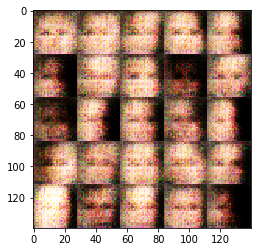

Epoch 1/1... Discriminator Loss: 0.4362... Generator Loss: 3.1336
Epoch 1/1... Discriminator Loss: 0.4490... Generator Loss: 2.6712
Epoch 1/1... Discriminator Loss: 1.4948... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 0.4842... Generator Loss: 3.1558
Epoch 1/1... Discriminator Loss: 0.4572... Generator Loss: 3.2749
Epoch 1/1... Discriminator Loss: 0.5043... Generator Loss: 2.4683
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 2.5470
Epoch 1/1... Discriminator Loss: 0.4402... Generator Loss: 3.3312
Epoch 1/1... Discriminator Loss: 0.5378... Generator Loss: 4.0193
Epoch 1/1... Discriminator Loss: 0.5347... Generator Loss: 4.0452


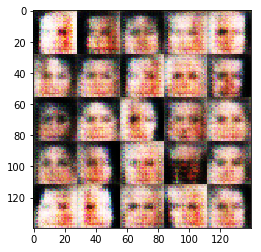

Epoch 1/1... Discriminator Loss: 0.5002... Generator Loss: 3.5057
Epoch 1/1... Discriminator Loss: 0.5038... Generator Loss: 2.8961
Epoch 1/1... Discriminator Loss: 0.5058... Generator Loss: 3.3160
Epoch 1/1... Discriminator Loss: 0.4622... Generator Loss: 2.8065
Epoch 1/1... Discriminator Loss: 0.6181... Generator Loss: 4.4550
Epoch 1/1... Discriminator Loss: 0.4774... Generator Loss: 2.8538
Epoch 1/1... Discriminator Loss: 0.4609... Generator Loss: 3.4929
Epoch 1/1... Discriminator Loss: 0.4183... Generator Loss: 3.7373
Epoch 1/1... Discriminator Loss: 0.4830... Generator Loss: 2.3961
Epoch 1/1... Discriminator Loss: 0.4382... Generator Loss: 3.2824


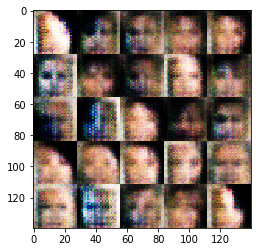

Epoch 1/1... Discriminator Loss: 0.4943... Generator Loss: 2.3185
Epoch 1/1... Discriminator Loss: 0.4544... Generator Loss: 2.8652
Epoch 1/1... Discriminator Loss: 0.4505... Generator Loss: 3.1643
Epoch 1/1... Discriminator Loss: 0.4706... Generator Loss: 2.8589
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 2.9058
Epoch 1/1... Discriminator Loss: 0.4689... Generator Loss: 3.0961
Epoch 1/1... Discriminator Loss: 0.4492... Generator Loss: 4.4649
Epoch 1/1... Discriminator Loss: 0.5117... Generator Loss: 4.6410
Epoch 1/1... Discriminator Loss: 0.7474... Generator Loss: 5.5228
Epoch 1/1... Discriminator Loss: 0.5138... Generator Loss: 2.5015


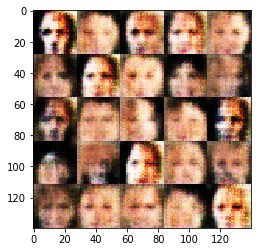

Epoch 1/1... Discriminator Loss: 0.4201... Generator Loss: 3.4278
Epoch 1/1... Discriminator Loss: 0.4354... Generator Loss: 3.5659
Epoch 1/1... Discriminator Loss: 0.4036... Generator Loss: 3.7336
Epoch 1/1... Discriminator Loss: 0.5542... Generator Loss: 2.6250
Epoch 1/1... Discriminator Loss: 0.4435... Generator Loss: 2.9140
Epoch 1/1... Discriminator Loss: 0.4396... Generator Loss: 3.2725
Epoch 1/1... Discriminator Loss: 0.4490... Generator Loss: 2.8025
Epoch 1/1... Discriminator Loss: 0.5013... Generator Loss: 5.0245
Epoch 1/1... Discriminator Loss: 0.4421... Generator Loss: 2.7315
Epoch 1/1... Discriminator Loss: 0.4888... Generator Loss: 2.5145


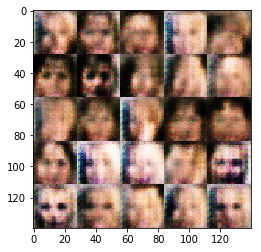

Epoch 1/1... Discriminator Loss: 0.4458... Generator Loss: 5.9519
Epoch 1/1... Discriminator Loss: 0.4893... Generator Loss: 2.8466
Epoch 1/1... Discriminator Loss: 0.4995... Generator Loss: 3.3777
Epoch 1/1... Discriminator Loss: 0.4542... Generator Loss: 3.5612
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 2.7586
Epoch 1/1... Discriminator Loss: 0.4732... Generator Loss: 3.0396
Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 3.3344
Epoch 1/1... Discriminator Loss: 0.5124... Generator Loss: 4.1284
Epoch 1/1... Discriminator Loss: 0.5276... Generator Loss: 4.1964
Epoch 1/1... Discriminator Loss: 0.4509... Generator Loss: 3.2427


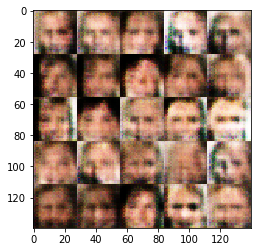

Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 3.1753
Epoch 1/1... Discriminator Loss: 0.4673... Generator Loss: 2.8107
Epoch 1/1... Discriminator Loss: 0.5563... Generator Loss: 2.2748
Epoch 1/1... Discriminator Loss: 0.4620... Generator Loss: 3.0814
Epoch 1/1... Discriminator Loss: 0.4701... Generator Loss: 2.9453
Epoch 1/1... Discriminator Loss: 0.4952... Generator Loss: 3.5593
Epoch 1/1... Discriminator Loss: 0.4387... Generator Loss: 3.0917
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 4.7233
Epoch 1/1... Discriminator Loss: 0.4576... Generator Loss: 2.9148
Epoch 1/1... Discriminator Loss: 0.5898... Generator Loss: 5.5033


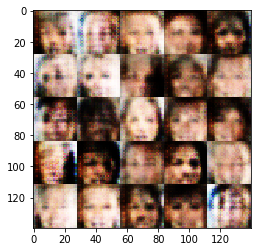

Epoch 1/1... Discriminator Loss: 0.5982... Generator Loss: 1.9320
Epoch 1/1... Discriminator Loss: 0.5194... Generator Loss: 2.5035
Epoch 1/1... Discriminator Loss: 0.4844... Generator Loss: 2.9533
Epoch 1/1... Discriminator Loss: 0.4897... Generator Loss: 3.1703
Epoch 1/1... Discriminator Loss: 0.4534... Generator Loss: 3.3413
Epoch 1/1... Discriminator Loss: 0.4577... Generator Loss: 3.3684
Epoch 1/1... Discriminator Loss: 0.6696... Generator Loss: 2.2454
Epoch 1/1... Discriminator Loss: 0.5231... Generator Loss: 2.7139
Epoch 1/1... Discriminator Loss: 0.5569... Generator Loss: 2.3848
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 5.7223


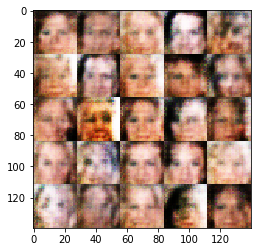

Epoch 1/1... Discriminator Loss: 0.5337... Generator Loss: 2.1693
Epoch 1/1... Discriminator Loss: 0.4694... Generator Loss: 3.0306
Epoch 1/1... Discriminator Loss: 0.5531... Generator Loss: 2.0903
Epoch 1/1... Discriminator Loss: 0.4529... Generator Loss: 3.0084
Epoch 1/1... Discriminator Loss: 0.6447... Generator Loss: 2.0488
Epoch 1/1... Discriminator Loss: 0.5389... Generator Loss: 2.3471
Epoch 1/1... Discriminator Loss: 0.4583... Generator Loss: 3.1156
Epoch 1/1... Discriminator Loss: 0.4680... Generator Loss: 2.9841
Epoch 1/1... Discriminator Loss: 0.6934... Generator Loss: 1.5372
Epoch 1/1... Discriminator Loss: 0.4940... Generator Loss: 3.1573


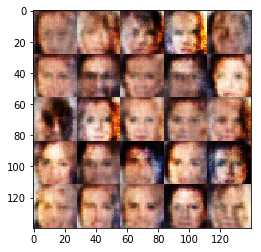

Epoch 1/1... Discriminator Loss: 0.6924... Generator Loss: 4.0611
Epoch 1/1... Discriminator Loss: 0.5632... Generator Loss: 2.2158
Epoch 1/1... Discriminator Loss: 0.5654... Generator Loss: 3.6512
Epoch 1/1... Discriminator Loss: 0.5326... Generator Loss: 4.0436
Epoch 1/1... Discriminator Loss: 0.4789... Generator Loss: 3.0547
Epoch 1/1... Discriminator Loss: 0.5573... Generator Loss: 3.1267
Epoch 1/1... Discriminator Loss: 0.5703... Generator Loss: 1.9814
Epoch 1/1... Discriminator Loss: 0.6457... Generator Loss: 1.5540
Epoch 1/1... Discriminator Loss: 0.5636... Generator Loss: 2.0686
Epoch 1/1... Discriminator Loss: 0.5796... Generator Loss: 2.4938


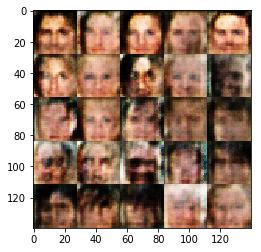

Epoch 1/1... Discriminator Loss: 0.5376... Generator Loss: 2.6549
Epoch 1/1... Discriminator Loss: 0.5580... Generator Loss: 2.5380
Epoch 1/1... Discriminator Loss: 0.5287... Generator Loss: 4.5265
Epoch 1/1... Discriminator Loss: 0.7394... Generator Loss: 1.6071
Epoch 1/1... Discriminator Loss: 0.5443... Generator Loss: 2.9607
Epoch 1/1... Discriminator Loss: 0.6073... Generator Loss: 2.0553
Epoch 1/1... Discriminator Loss: 0.6205... Generator Loss: 3.7380
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 1.2951
Epoch 1/1... Discriminator Loss: 0.5892... Generator Loss: 2.2400
Epoch 1/1... Discriminator Loss: 0.5648... Generator Loss: 2.2042


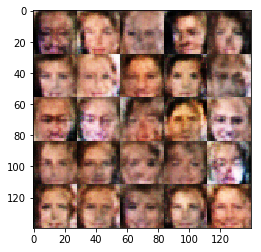

Epoch 1/1... Discriminator Loss: 0.5683... Generator Loss: 3.0621
Epoch 1/1... Discriminator Loss: 0.5188... Generator Loss: 3.4832
Epoch 1/1... Discriminator Loss: 0.5061... Generator Loss: 3.2413
Epoch 1/1... Discriminator Loss: 0.4565... Generator Loss: 3.3370
Epoch 1/1... Discriminator Loss: 0.5770... Generator Loss: 2.1514
Epoch 1/1... Discriminator Loss: 0.6546... Generator Loss: 1.6343
Epoch 1/1... Discriminator Loss: 0.5144... Generator Loss: 2.4133
Epoch 1/1... Discriminator Loss: 0.5386... Generator Loss: 2.4370
Epoch 1/1... Discriminator Loss: 0.6515... Generator Loss: 1.7737
Epoch 1/1... Discriminator Loss: 0.5817... Generator Loss: 2.4363


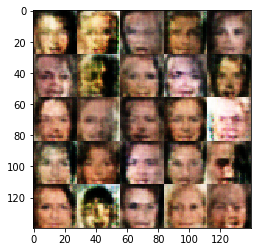

Epoch 1/1... Discriminator Loss: 0.5675... Generator Loss: 2.5403
Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 3.1458
Epoch 1/1... Discriminator Loss: 0.4976... Generator Loss: 2.6621
Epoch 1/1... Discriminator Loss: 0.5167... Generator Loss: 2.5184
Epoch 1/1... Discriminator Loss: 0.5947... Generator Loss: 2.3014
Epoch 1/1... Discriminator Loss: 0.7144... Generator Loss: 1.6703
Epoch 1/1... Discriminator Loss: 0.8044... Generator Loss: 1.4068
Epoch 1/1... Discriminator Loss: 0.6688... Generator Loss: 1.6814
Epoch 1/1... Discriminator Loss: 0.7332... Generator Loss: 4.1820
Epoch 1/1... Discriminator Loss: 0.5802... Generator Loss: 2.4404


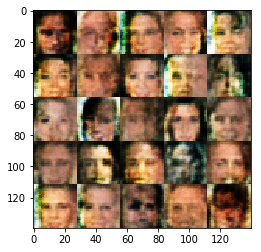

Epoch 1/1... Discriminator Loss: 0.5912... Generator Loss: 2.0886
Epoch 1/1... Discriminator Loss: 0.6163... Generator Loss: 1.8212
Epoch 1/1... Discriminator Loss: 0.5718... Generator Loss: 2.9438
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 2.9773
Epoch 1/1... Discriminator Loss: 0.7050... Generator Loss: 1.7220
Epoch 1/1... Discriminator Loss: 0.5166... Generator Loss: 3.0800
Epoch 1/1... Discriminator Loss: 0.5492... Generator Loss: 2.8046
Epoch 1/1... Discriminator Loss: 0.6412... Generator Loss: 2.0543
Epoch 1/1... Discriminator Loss: 0.5387... Generator Loss: 2.3475
Epoch 1/1... Discriminator Loss: 0.5478... Generator Loss: 2.3038


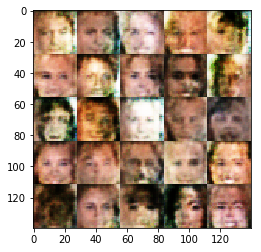

Epoch 1/1... Discriminator Loss: 0.5976... Generator Loss: 2.6242
Epoch 1/1... Discriminator Loss: 0.5470... Generator Loss: 3.3059
Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 2.7661
Epoch 1/1... Discriminator Loss: 0.7169... Generator Loss: 1.5378
Epoch 1/1... Discriminator Loss: 0.5477... Generator Loss: 2.5549
Epoch 1/1... Discriminator Loss: 0.7890... Generator Loss: 1.5870
Epoch 1/1... Discriminator Loss: 0.7214... Generator Loss: 3.5601
Epoch 1/1... Discriminator Loss: 0.6384... Generator Loss: 3.8437
Epoch 1/1... Discriminator Loss: 0.6632... Generator Loss: 3.0873
Epoch 1/1... Discriminator Loss: 0.5070... Generator Loss: 2.5863


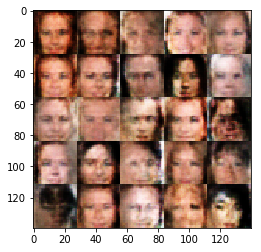

Epoch 1/1... Discriminator Loss: 0.5953... Generator Loss: 1.9384
Epoch 1/1... Discriminator Loss: 0.5956... Generator Loss: 2.0695
Epoch 1/1... Discriminator Loss: 0.5761... Generator Loss: 2.9544
Epoch 1/1... Discriminator Loss: 0.4687... Generator Loss: 3.1406
Epoch 1/1... Discriminator Loss: 0.4690... Generator Loss: 3.5095
Epoch 1/1... Discriminator Loss: 0.6301... Generator Loss: 1.6074
Epoch 1/1... Discriminator Loss: 0.6127... Generator Loss: 2.5950
Epoch 1/1... Discriminator Loss: 0.5159... Generator Loss: 3.3135
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 1.6757
Epoch 1/1... Discriminator Loss: 0.5431... Generator Loss: 2.5588


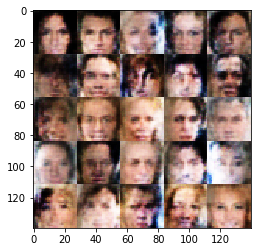

Epoch 1/1... Discriminator Loss: 0.6257... Generator Loss: 1.9356
Epoch 1/1... Discriminator Loss: 0.5471... Generator Loss: 3.5335
Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 2.0141
Epoch 1/1... Discriminator Loss: 0.6028... Generator Loss: 1.9100
Epoch 1/1... Discriminator Loss: 0.5126... Generator Loss: 3.0649
Epoch 1/1... Discriminator Loss: 0.5454... Generator Loss: 3.4854
Epoch 1/1... Discriminator Loss: 0.6048... Generator Loss: 1.7253
Epoch 1/1... Discriminator Loss: 0.9466... Generator Loss: 1.0903
Epoch 1/1... Discriminator Loss: 0.6224... Generator Loss: 2.1990
Epoch 1/1... Discriminator Loss: 0.5277... Generator Loss: 3.0570


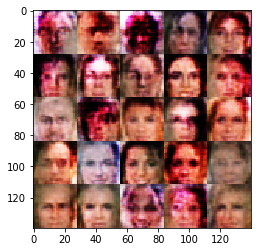

Epoch 1/1... Discriminator Loss: 0.5140... Generator Loss: 2.5638
Epoch 1/1... Discriminator Loss: 0.6263... Generator Loss: 1.9641
Epoch 1/1... Discriminator Loss: 0.6381... Generator Loss: 1.7832
Epoch 1/1... Discriminator Loss: 0.5956... Generator Loss: 2.0811
Epoch 1/1... Discriminator Loss: 0.5432... Generator Loss: 3.0218
Epoch 1/1... Discriminator Loss: 0.5786... Generator Loss: 2.1995
Epoch 1/1... Discriminator Loss: 0.5570... Generator Loss: 2.6026
Epoch 1/1... Discriminator Loss: 0.5509... Generator Loss: 2.4598
Epoch 1/1... Discriminator Loss: 0.4875... Generator Loss: 2.8700
Epoch 1/1... Discriminator Loss: 0.5822... Generator Loss: 2.7571


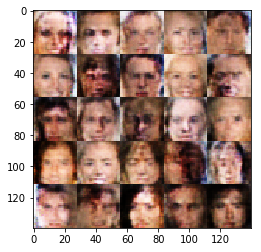

Epoch 1/1... Discriminator Loss: 0.5670... Generator Loss: 2.1007
Epoch 1/1... Discriminator Loss: 0.5321... Generator Loss: 2.8720
Epoch 1/1... Discriminator Loss: 0.5332... Generator Loss: 3.0788
Epoch 1/1... Discriminator Loss: 0.5883... Generator Loss: 2.0911
Epoch 1/1... Discriminator Loss: 0.7206... Generator Loss: 3.3865
Epoch 1/1... Discriminator Loss: 0.5493... Generator Loss: 2.2718
Epoch 1/1... Discriminator Loss: 0.5594... Generator Loss: 2.5575
Epoch 1/1... Discriminator Loss: 0.8746... Generator Loss: 3.5111
Epoch 1/1... Discriminator Loss: 0.5444... Generator Loss: 2.7090
Epoch 1/1... Discriminator Loss: 0.5832... Generator Loss: 2.3651


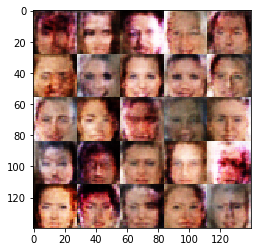

Epoch 1/1... Discriminator Loss: 0.5509... Generator Loss: 2.7462
Epoch 1/1... Discriminator Loss: 0.5000... Generator Loss: 2.8905
Epoch 1/1... Discriminator Loss: 0.5559... Generator Loss: 2.3338
Epoch 1/1... Discriminator Loss: 0.5783... Generator Loss: 2.6983
Epoch 1/1... Discriminator Loss: 0.6757... Generator Loss: 3.0842
Epoch 1/1... Discriminator Loss: 0.5695... Generator Loss: 2.1669
Epoch 1/1... Discriminator Loss: 0.5384... Generator Loss: 2.7592
Epoch 1/1... Discriminator Loss: 0.8955... Generator Loss: 4.2426
Epoch 1/1... Discriminator Loss: 0.8924... Generator Loss: 4.5504
Epoch 1/1... Discriminator Loss: 0.5621... Generator Loss: 2.5916


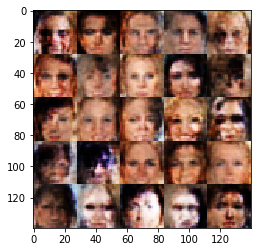

Epoch 1/1... Discriminator Loss: 0.5592... Generator Loss: 2.3157
Epoch 1/1... Discriminator Loss: 0.5763... Generator Loss: 1.9670
Epoch 1/1... Discriminator Loss: 0.5173... Generator Loss: 2.4969
Epoch 1/1... Discriminator Loss: 0.5117... Generator Loss: 2.3875
Epoch 1/1... Discriminator Loss: 0.6410... Generator Loss: 1.6151
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 4.4156
Epoch 1/1... Discriminator Loss: 0.5140... Generator Loss: 2.7218
Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 2.0238
Epoch 1/1... Discriminator Loss: 0.5923... Generator Loss: 2.6076
Epoch 1/1... Discriminator Loss: 0.5625... Generator Loss: 2.4086


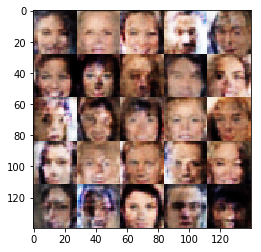

Epoch 1/1... Discriminator Loss: 0.5202... Generator Loss: 2.5893
Epoch 1/1... Discriminator Loss: 0.5510... Generator Loss: 2.0639
Epoch 1/1... Discriminator Loss: 0.6213... Generator Loss: 1.7639
Epoch 1/1... Discriminator Loss: 0.5360... Generator Loss: 2.4410
Epoch 1/1... Discriminator Loss: 0.4959... Generator Loss: 3.1392
Epoch 1/1... Discriminator Loss: 0.5107... Generator Loss: 2.3728
Epoch 1/1... Discriminator Loss: 0.5937... Generator Loss: 2.0190
Epoch 1/1... Discriminator Loss: 0.6015... Generator Loss: 2.8730
Epoch 1/1... Discriminator Loss: 0.5265... Generator Loss: 2.4995
Epoch 1/1... Discriminator Loss: 0.6109... Generator Loss: 2.8747


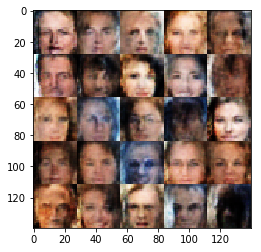

Epoch 1/1... Discriminator Loss: 0.5676... Generator Loss: 2.1871
Epoch 1/1... Discriminator Loss: 0.5337... Generator Loss: 2.5555
Epoch 1/1... Discriminator Loss: 0.5571... Generator Loss: 1.9217
Epoch 1/1... Discriminator Loss: 0.5172... Generator Loss: 2.9973
Epoch 1/1... Discriminator Loss: 0.5698... Generator Loss: 2.2385
Epoch 1/1... Discriminator Loss: 0.6236... Generator Loss: 2.1878
Epoch 1/1... Discriminator Loss: 0.6759... Generator Loss: 1.7015
Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 2.5701
Epoch 1/1... Discriminator Loss: 0.6336... Generator Loss: 1.8257
Epoch 1/1... Discriminator Loss: 0.6104... Generator Loss: 2.0972


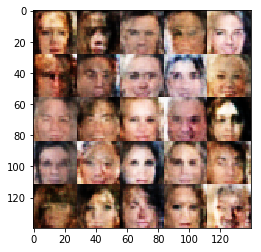

Epoch 1/1... Discriminator Loss: 0.6071... Generator Loss: 2.4825
Epoch 1/1... Discriminator Loss: 0.5711... Generator Loss: 1.9608
Epoch 1/1... Discriminator Loss: 0.6419... Generator Loss: 3.3151
Epoch 1/1... Discriminator Loss: 0.5787... Generator Loss: 3.1827
Epoch 1/1... Discriminator Loss: 0.6320... Generator Loss: 2.9322
Epoch 1/1... Discriminator Loss: 0.5822... Generator Loss: 2.3234
Epoch 1/1... Discriminator Loss: 0.6563... Generator Loss: 1.9798
Epoch 1/1... Discriminator Loss: 0.5660... Generator Loss: 2.2177
Epoch 1/1... Discriminator Loss: 0.4988... Generator Loss: 2.5917
Epoch 1/1... Discriminator Loss: 0.5398... Generator Loss: 2.4931


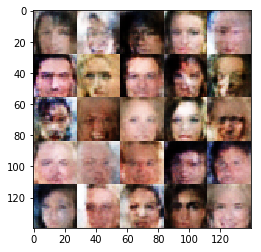

Epoch 1/1... Discriminator Loss: 0.5251... Generator Loss: 2.7982
Epoch 1/1... Discriminator Loss: 0.5302... Generator Loss: 2.2782
Epoch 1/1... Discriminator Loss: 0.5647... Generator Loss: 2.7350
Epoch 1/1... Discriminator Loss: 0.5710... Generator Loss: 2.1904
Epoch 1/1... Discriminator Loss: 0.6756... Generator Loss: 3.7143
Epoch 1/1... Discriminator Loss: 0.4894... Generator Loss: 2.6850
Epoch 1/1... Discriminator Loss: 0.5386... Generator Loss: 2.7451
Epoch 1/1... Discriminator Loss: 0.5215... Generator Loss: 2.4041
Epoch 1/1... Discriminator Loss: 0.6032... Generator Loss: 3.9317
Epoch 1/1... Discriminator Loss: 0.6247... Generator Loss: 3.1070


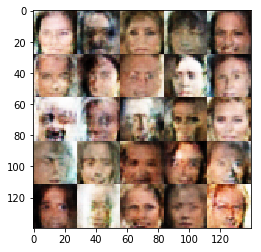

Epoch 1/1... Discriminator Loss: 0.4805... Generator Loss: 2.9751
Epoch 1/1... Discriminator Loss: 0.5397... Generator Loss: 3.3402
Epoch 1/1... Discriminator Loss: 0.5102... Generator Loss: 3.8327
Epoch 1/1... Discriminator Loss: 0.5801... Generator Loss: 1.8148
Epoch 1/1... Discriminator Loss: 0.6733... Generator Loss: 1.7539
Epoch 1/1... Discriminator Loss: 0.5734... Generator Loss: 2.4186
Epoch 1/1... Discriminator Loss: 1.4853... Generator Loss: 4.7191
Epoch 1/1... Discriminator Loss: 0.7163... Generator Loss: 3.2175
Epoch 1/1... Discriminator Loss: 0.6706... Generator Loss: 2.5909
Epoch 1/1... Discriminator Loss: 0.5170... Generator Loss: 2.3315


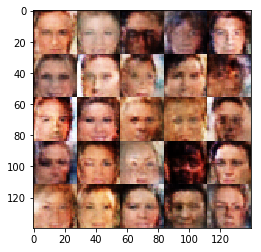

Epoch 1/1... Discriminator Loss: 0.5711... Generator Loss: 2.3968
Epoch 1/1... Discriminator Loss: 0.6111... Generator Loss: 2.3540
Epoch 1/1... Discriminator Loss: 0.5701... Generator Loss: 2.7460
Epoch 1/1... Discriminator Loss: 0.5108... Generator Loss: 3.4681
Epoch 1/1... Discriminator Loss: 0.5432... Generator Loss: 2.5903
Epoch 1/1... Discriminator Loss: 0.5672... Generator Loss: 2.1131
Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 2.1803
Epoch 1/1... Discriminator Loss: 0.5650... Generator Loss: 2.5437
Epoch 1/1... Discriminator Loss: 0.5243... Generator Loss: 2.3902
Epoch 1/1... Discriminator Loss: 0.5240... Generator Loss: 2.4398


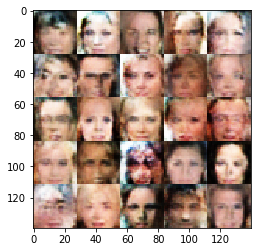

Epoch 1/1... Discriminator Loss: 0.5035... Generator Loss: 2.8217
Epoch 1/1... Discriminator Loss: 0.5320... Generator Loss: 2.4943
Epoch 1/1... Discriminator Loss: 0.5907... Generator Loss: 2.4264
Epoch 1/1... Discriminator Loss: 0.7278... Generator Loss: 1.4701
Epoch 1/1... Discriminator Loss: 0.5364... Generator Loss: 3.4282
Epoch 1/1... Discriminator Loss: 0.5296... Generator Loss: 2.2552
Epoch 1/1... Discriminator Loss: 0.4629... Generator Loss: 2.8685
Epoch 1/1... Discriminator Loss: 0.6247... Generator Loss: 1.9166
Epoch 1/1... Discriminator Loss: 0.5347... Generator Loss: 2.1810
Epoch 1/1... Discriminator Loss: 0.5772... Generator Loss: 3.3820


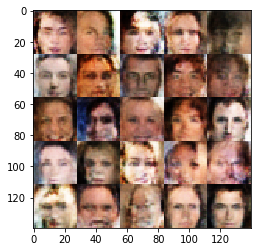

Epoch 1/1... Discriminator Loss: 0.5488... Generator Loss: 2.2406
Epoch 1/1... Discriminator Loss: 0.7766... Generator Loss: 1.2535
Epoch 1/1... Discriminator Loss: 0.5558... Generator Loss: 2.3974
Epoch 1/1... Discriminator Loss: 0.5301... Generator Loss: 2.6467
Epoch 1/1... Discriminator Loss: 0.5555... Generator Loss: 3.2260
Epoch 1/1... Discriminator Loss: 0.5690... Generator Loss: 2.1011
Epoch 1/1... Discriminator Loss: 0.5553... Generator Loss: 1.8874
Epoch 1/1... Discriminator Loss: 0.5164... Generator Loss: 2.3972
Epoch 1/1... Discriminator Loss: 0.6261... Generator Loss: 2.0319
Epoch 1/1... Discriminator Loss: 0.5857... Generator Loss: 2.5686


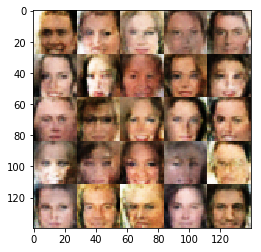

Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 0.7535... Generator Loss: 1.9107
Epoch 1/1... Discriminator Loss: 0.6263... Generator Loss: 3.6225
Epoch 1/1... Discriminator Loss: 0.5427... Generator Loss: 2.1107
Epoch 1/1... Discriminator Loss: 0.5706... Generator Loss: 2.6201
Epoch 1/1... Discriminator Loss: 0.5469... Generator Loss: 2.1253


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.